In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [5]:
from ftnmr import *

Hydrogens and their frequencies and ratios

In [158]:
from string import ascii_lowercase as asc
from scipy.special import binom
from itertools import product
from timeit import timeit

In [27]:
gamma = 267.52218744*pow(10, 6)
B = 10.0

In [94]:
for x in asc[:5]:
    print(x)

a
b
c
d
e


In [7]:
A = {
    'a':(1, 2.3),
    'b':(1, 3.3),
    'c':(3, 4.5)}

j1 = ('a', 'b', 3.200)
j2 = ('b', 'c', 3.200)
B = [j1, j2]

In [87]:
C = {a:[] for a in A}
print(C)

for k in A:
    for b in B:
        if k == b[0]: C[k].append( (b[2], A[b[1]][0]) )
        elif k == b[1]: C[k].append( (b[2], A[b[0]][0]) )

{'a': [], 'b': [], 'c': []}


{'a': [(3.2, 1)], 'b': [(3.2, 1), (3.2, 3)], 'c': [(3.2, 1)]}

In [93]:
F = {a:([], []) for a in A}
for k in A:
    for b, d in C[k]:
        F[k][0].append( np.array([n*b/2 for n in range(-d, d+1, 2)]) )
        F[k][1].append( np.array([binom(d, x)/pow(2,d) for x in range(0, d+1)]))

{'a': ([array([-1.6,  1.6])], [array([0.5, 0.5])]),
 'b': ([array([-1.6,  1.6]), array([-4.8, -1.6,  1.6,  4.8])],
  [array([0.5, 0.5]), array([0.125, 0.375, 0.375, 0.125])]),
 'c': ([array([-1.6,  1.6])], [array([0.5, 0.5])])}

In [23]:
# this combines the above two cells into one

F = {a:([], []) for a in A}

for k in A:
    for b in B:
        if k == b[0]: 
            d = A[b[1]][0]
            F[k][0].append( [n*b[2]/2 for n in range(-d, d+1, 2)] )
            F[k][1].append( [binom(d, x)/pow(2,d) for x in range(0, d+1)] )
        elif k == b[1]: 
            d = A[b[0]][0]
            F[k][0].append( [n*b[2]/2 for n in range(-d, d+1, 2)] )
            F[k][1].append( [binom(d, x)/pow(2,d) for x in range(0, d+1)] )

{'a': ([[-1.6, 1.6]], [[0.5, 0.5]]),
 'b': ([[-1.6, 1.6], [-4.800000000000001, -1.6, 1.6, 4.800000000000001]],
  [[0.5, 0.5], [0.125, 0.375, 0.375, 0.125]]),
 'c': ([[-1.6, 1.6]], [[0.5, 0.5]])}

In [7]:
from itertools import product

In [102]:
G = {a:([], []) for a in A}

for k in A:
    for i in product(*F[k][0]):
        G[k][0].append(sum(i))
        
    for i in product(*F[k][1]):
        G[k][1].append(np.prod(i))

{'a': ([-1.6, 1.6], [0.5, 0.5]),
 'b': ([-6.4,
   -3.2,
   0.0,
   3.2000000000000006,
   -3.2000000000000006,
   0.0,
   3.2,
   6.4],
  [0.0625, 0.1875, 0.1875, 0.0625, 0.0625, 0.1875, 0.1875, 0.0625]),
 'c': ([-1.6, 1.6], [0.5, 0.5])}

In [117]:
I = {k:([],[]) for k in A}

for k in A:
    for n in np.argsort(H[k][0]):
        I[k][0].append(H[k][0][n])
        I[k][1].append(H[k][1][n])

{'a': ([-1.6, 1.6], [0.5, 0.5]),
 'b': ([-6.4,
   -3.2000000000000006,
   -3.2,
   0.0,
   0.0,
   3.2,
   3.2000000000000006,
   6.4],
  [0.0625, 0.0625, 0.1875, 0.1875, 0.1875, 0.1875, 0.0625, 0.0625]),
 'c': ([-1.6, 1.6], [0.5, 0.5])}

In [102]:
K = {k:([J0[k][0]],[J1[k][0]]) for k in A}

for k in A:
    for i in range(1, len(J[k][0])):
        if np.isclose(K[k][0][-1], J[k][0][i]):
            K[k][1][-1] += J[k][1][i]
        else:
            K[k][0].append(J[k][0][i])
            K[k][1].append(J[k][1][i])

{'a': ([-1.6, 1.6], [0.5, 0.5]),
 'b': ([-6.4, -3.2000000000000006, 0.0, 3.2, 6.4],
  [0.0625, 0.25, 0.375, 0.25, 0.0625]),
 'c': ([-1.6, 1.6], [0.5, 0.5])}

Molecule construction

In [8]:
hydrogens = {
        'a':(3, 2.3),
        'b':(4, 3.3),
        'c':(4, 4.5)}

j1 = ('a', 'b', 2.000)
j2 = ('b', 'c', 3.500)
couplings = [j1, j2]

In [9]:
from itertools import product
A = list(dict.fromkeys([k for b in couplings for k in b[:-1]]))
B = {k:[ (b[2], hydrogens[ b[ 1-b.index(k) ] ][0]) for b in couplings if k in b] for k in A}

F0 = {k:[ [n*b/2 for n in range(-d, d+1, 2)] for b, d in B[k]] for k in A}
F1 = {k:[ [binom(d, x)/pow(2,d) for x in range(0, d+1)] for b, d in B[k]] for k in A}
G0 = {k:[ sum(i) for i in product(*F0[k]) ] for k in A}
G1 = {k:[ np.prod(i) for i in product(*F1[k]) ] for k in A}
J0 = {k:[G0[k][n] for n in np.argsort(G0[k])] for k in A}
J1 = {k:[G1[k][n] for n in np.argsort(G0[k])] for k in A}

ind = lambda k: filter(lambda i: not np.isclose(J0[k][i-1], J0[k][i]), range(0, len(J0[k])))
K0 = {k:[J0[k][i] for i in ind(k)] for k in A}
K1 = {k:[J1[k][i] for i in ind(k)] for k in A}

dup = lambda k: filter(lambda i: np.isclose(J0[k][i-1], J0[k][i]), range(0, len(J0[k])))
for k in A:
    n = 0
    for i in dup(k):
        K1[k][i-1-n] += J1[k][i]
        n += 1

In [10]:
sum(K1['b'])

1.0

The representative spectrum 1H NMR obtained from serum samples of HC subjects. The following metabolites are identified: 

1, L_1; 

2, L_2; 

3, Isoleucine; 

4, Leucine; 

5, Valine; 

6, Unk_1; 

7, 3-Hydroxybutyrate; 

8, L_3; 

9, L_4; 

10, L_5; 

11, Lactate; 

12, Alanine; 

13, L_6; 

14, Acetate; 

15, L_7; 

16, L_8; 

17, NAC; 

18, Acetone; 

19, Acetoacetate; 

20, Pyruvate; 

21, Glutamine; 

22, Citrate; 

23, Unk_2; 

24, Creatine; 

25, Dimethyl sulfone; 

26, Chol+GPC+APC; 

27, Glucose; 

28, Betaine; 

29, Methanol; 

30, Glycerol; 

31, Creatinine; 

32, L_9; 

33, Tyrosine; 

34, π-Methylhistidine; 

35, Phenylalanine; 

36, Formate

In [8]:
hydrogens = {
    'a':(3, 1.100),
    'b':(2, 3.600),
    'c':(1, 3.250)}

j1 = ('a', 'b', 5.000)
couplings = [j1]

In [9]:
ethanol = molecule(hydrogens=hydrogens, couplings=couplings)

In [10]:
hydrogens = {
    'a':(3, 1.300),
    'b':(1, 4.100)}

j1 = ('a', 'b', 7.000)
couplings = [j1]

In [11]:
lactate = molecule(hydrogens=hydrogens, couplings=couplings)

In [12]:
hydrogens = {
    'a':(1, 3.900),
    'b':(9, 3.250)}

couplings = []

In [13]:
betaine = molecule(hydrogens=hydrogens, couplings=couplings)

In [210]:
hydrogens = {
    'a':(12, 10.0)}

couplings = []

In [211]:
TMS =  molecule(hydrogens=hydrogens, couplings=couplings)

In [212]:
molecules = {
    'A':(ethanol, 0.523),
    'B':(lactate, 0.782),
    'C':(betaine, 1.321),
    'D':(TMS, 1.0)}

In [213]:
nmr_sample = sample(molecules=molecules)

In [71]:
nmr_sample.__dict__

{'molecules': {'A': (<ftnmr.molecule at 0x7f411812f3d0>, 0.523),
  'B': (<ftnmr.molecule at 0x7f411812f100>, 0.782),
  'C': (<ftnmr.molecule at 0x7f411812f310>, 1.321),
  'D': (<ftnmr.molecule at 0x7f410ca1c220>, 1.0)},
 'T2': 100.0,
 'r': 0.01,
 'timeunit': 'msec'}

In [72]:
molecules

{'A': (<ftnmr.molecule at 0x7f411812f3d0>, 0.523),
 'B': (<ftnmr.molecule at 0x7f411812f100>, 0.782),
 'C': (<ftnmr.molecule at 0x7f411812f310>, 1.321),
 'D': (<ftnmr.molecule at 0x7f410ca1c220>, 1.0)}

In [73]:
nmr_sample.molecules['A'][0].hydrogens

{'a': (3, 1.1), 'b': (2, 3.6), 'c': (1, 3.25)}

In [74]:
# number of 'a' group hydrogens of 'A' molecule of the sample
nmr_sample.molecules['A'][0].splits

{'a': (array([-5.,  0.,  5.]), array([0.25, 0.5 , 0.25])),
 'b': (array([-7.5, -2.5,  2.5,  7.5]), array([0.125, 0.375, 0.375, 0.125]))}

In [75]:
# chemical shift of 'a' group hydrogens of 'A' molecule of the sample
nmr_sample.molecules['A'][0].hydrogens['a'][1]

1.1

In [76]:
RH = 12

In [77]:
moles = nmr_sample.molecules

In [79]:
moles['A'][0].__dict__

{'hydrogens': {'a': (3, 1.1), 'b': (2, 3.6), 'c': (1, 3.25)},
 'couplings': [('a', 'b', 5.0)],
 'splits': {'a': (array([-5.,  0.,  5.]), array([0.25, 0.5 , 0.25])),
  'b': (array([-7.5, -2.5,  2.5,  7.5]), array([0.125, 0.375, 0.375, 0.125]))}}

In [80]:
test1 = {
    f'{x}_{y}{0.0:+}': (
        pow(10, -6)*moles[x][0].hydrogens[y][1]*gamma*B,
        moles[x][1]*moles[x][0].hydrogens[y][0]/RH)
    for x in moles for y in moles[x][0].hydrogens if y not in moles[x][0].splits}

In [81]:
test1

{'A_c+0.0': (8694.471091799998, 0.043583333333333335),
 'C_a+0.0': (10433.365310159998, 0.11008333333333332),
 'C_b+0.0': (8694.471091799998, 0.9907499999999999),
 'D_a+0.0': (0.0, 1.0)}

In [82]:
test2 = {
    f'{x}_{y}{z:+}': (
        pow(10, -6)*moles[x][0].hydrogens[y][1]*gamma*B + 2*np.pi*z,
        moles[x][1]*moles[x][0].hydrogens[y][0]*k/RH)
    for x in moles for y in moles[x][0].splits
    for z, k in zip(moles[x][0].splits[y][0], moles[x][0].splits[y][1])}

In [134]:
nmr_sample.r

0.01

In [214]:
spec = spectrometer()

In [215]:
spec.measure(sample=nmr_sample)

In [169]:
1000/spec.f_s

18.34890245256755

In [161]:
%timeit np.fft.fft(spec.C[0])[:10]

416 µs ± 5.21 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [162]:
%timeit np.fft.fft(spec.C[0])

421 µs ± 5.88 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [216]:
S = np.fft.fft(spec.C[4])

In [217]:
for w, N in spec.A:
    print(w, N)

8.694471091799999 0.043583333333333335
10.433365310159997 0.11008333333333332
8.694471091799999 0.9907499999999999
26.752218743999993 1.0
2.911328135304102 0.032687499999999994
2.9427440618399996 0.06537499999999999
2.9741599883758973 0.032687499999999994
9.58367485803615 0.010895833333333334
9.615090784572049 0.032687499999999994
9.646506711107948 0.032687499999999994
9.677922637643846 0.010895833333333334
3.455797288144871 0.09775
3.499779585295128 0.09775
10.902436239314612 0.008145833333333333
10.946418536464869 0.0244375
10.990400833615126 0.0244375
11.034383130765383 0.008145833333333333


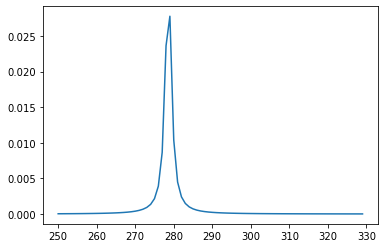

In [221]:
plt.plot(range(len(S))[250:330], S.real[250:330])

In [209]:
spec.A

[(8.694471091799999, 0.043583333333333335),
 (10.433365310159997, 0.11008333333333332),
 (8.694471091799999, 0.9907499999999999),
 (0.0, 1.0),
 (2.911328135304102, 0.032687499999999994),
 (2.9427440618399996, 0.06537499999999999),
 (2.9741599883758973, 0.032687499999999994),
 (9.58367485803615, 0.010895833333333334),
 (9.615090784572049, 0.032687499999999994),
 (9.646506711107948, 0.032687499999999994),
 (9.677922637643846, 0.010895833333333334),
 (3.455797288144871, 0.09775),
 (3.499779585295128, 0.09775),
 (10.902436239314612, 0.008145833333333333),
 (10.946418536464869, 0.0244375),
 (10.990400833615126, 0.0244375),
 (11.034383130765383, 0.008145833333333333)]

In [198]:
import inspect

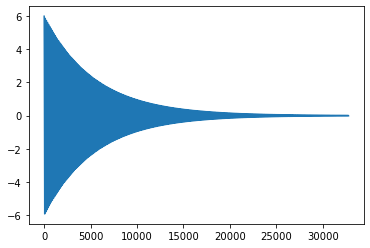

In [206]:
plt.plot(range(len(S)), 1_000_000*spec.C[4].real)
plt.ticklabel_format(style='plain')

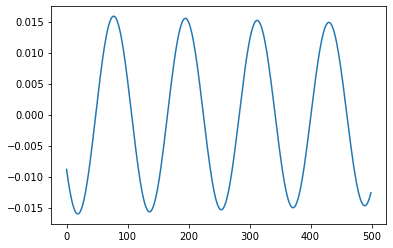

In [207]:
plt.plot(range(500), 1_000_000*spec.C[4].real[-500:])
plt.ticklabel_format(style='plain')

In [309]:
w = pow(10, -6)*shift*gamma*B

In [310]:
w

26752.21874399999

In [311]:
f0 = 0.5*w/np.pi

In [312]:
f0

4257.747851783254

In [86]:
a0 = [1, 2, 3, 4]
b0 = [4, 3, 2, 1]
a1 = [1, 2, 3, 4]
b1 = [4, 3, 2, 1]
a2 = [1, 2, 3, 4]
b2 = [4, 3, 2, 1]
a3 = [1, 2, 3, 4]
b3 = [4, 3, 2, 1]
A = [a0, b0, a1, b1, a2, b2, a3, b3]

In [87]:
np.sum(A,axis=0) # or axis=1

array([20, 20, 20, 20])

In [37]:
class foo():
    aa = 123123
    def __init__(self):
        self.b = self.aa

In [39]:
babo = foo()